In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

In [2]:
# Carregamento da base de dados e normalização
(previsores_treinamento, _), (previsores_teste, _) = cifar10.load_data()
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

# Como essa base de dados apresenta imagens coloridas temos 3 canais e não somente
# um canal como na base MNIST. As dimensão dessas imagens é 32 x 32, portanto
# teremos um total de 3072 características (32 x 32 x 3 canais)
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

In [3]:
# Criação do autoencoder
autoencoder = Sequential()

# ENCODE
# Estrutura do encoder: 3072 - 1536 - 768 - 1536 - 3072
# Você pode testar com outras arquiteturas também, mas uma dica é dividir as
# dimensões pela metade. Por exemplo, para chegar no valor de 1536 dividimos
# 3072 / 2 e para chegar no valor de 768 dividimos 1532 / 2

# Trabalharemos com a dimensão mínima de 768, ou seja, de 3072 pixels reduziremos para 768
# Como são imagens com mais pixels, se diminuirmos muito a dimensão final o autoencoder
# pode apresentar resultados ruins
# O número de entradas é 3072 que equivale ao número total de pixels da imagem
autoencoder.add(Dense(units = 1536, activation = 'relu', input_dim = 3072))
autoencoder.add(Dense(units = 768, activation = 'relu'))

# DECODE
# Faz o processo inverso, ou seja, 768 - 1536 - 3072
autoencoder.add(Dense(units = 1536, activation = 'relu'))
autoencoder.add(Dense(units = 3072, activation = 'sigmoid'))

# Compilação e aprendizagem, mantendo os parâmetros padrões
# Os resultados não serão tão bons caso use um número pequeno de épocas
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento, epochs = 100, batch_size = 256, validation_data = (previsores_teste, previsores_teste))

# Cria um novo modelo para capturar somente a aprendizagem da rede, que é o codificador
dimensao_original = Input(shape = (3072,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
encoder = Model(dimensao_original, camada_encoder2(camada_encoder1(dimensao_original)))

# Cria as variáveis com as imagens codificadas e decodificadas
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

Epoch 1/100
196/196 [==============================] - 52s 261ms/step - loss: 0.6490 - accuracy: 0.0022 - val_loss: 0.6004 - val_accuracy: 0.0046
Epoch 2/100
196/196 [==============================] - 63s 319ms/step - loss: 0.5977 - accuracy: 0.0049 - val_loss: 0.5883 - val_accuracy: 0.0051
Epoch 3/100
196/196 [==============================] - 49s 250ms/step - loss: 0.5860 - accuracy: 0.0063 - val_loss: 0.5851 - val_accuracy: 0.0062
Epoch 4/100
196/196 [==============================] - 50s 255ms/step - loss: 0.5804 - accuracy: 0.0071 - val_loss: 0.5807 - val_accuracy: 0.0084
Epoch 5/100
196/196 [==============================] - 55s 280ms/step - loss: 0.5785 - accuracy: 0.0092 - val_loss: 0.5796 - val_accuracy: 0.0087
Epoch 6/100
196/196 [==============================] - 61s 312ms/step - loss: 0.5759 - accuracy: 0.0098 - val_loss: 0.5751 - val_accuracy: 0.0133
Epoch 7/100
196/196 [==============================] - 62s 316ms/step - loss: 0.5748 - accuracy: 0.0100 - val_loss: 0.5738 -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

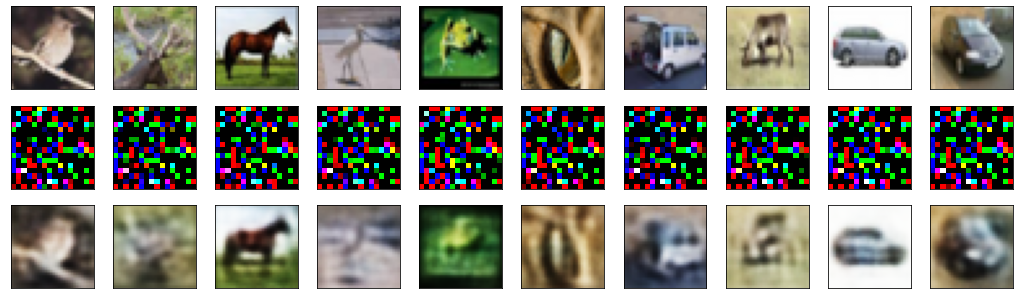

In [4]:
# Visualiza 10 imagens escolhidas aleatoriamente
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)

plt.figure(figsize = (18, 18))

for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())
    
    # Imagem codificada, nas dimensões 16x16 com 3 canais
    # Se multiplicar os três valores teremos o valor mínimo que é 768 pixels
    eixo = plt.subplot(10, 10, numero_imagens + i + 1)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 16, 3))
    plt.xticks(())
    plt.yticks(())

    # Imagem decodificada, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(10, 10, 2 * numero_imagens + i + 1)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())
plt.show()